## Visualizing Regression Model

### Introduction
The regression plots in seaborn are primarily intended to add a visual guide that helps to emphasize patterns in a dataset during exploratory data analyses.

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sb
sb.set_theme(color_codes=True)

### Importing the dataset

In [2]:
tips=sb.load_dataset("tips")

### Functions to draw Linear Regression Models

Two main functions in seaborn are used to visualize a linear relationship as determined through regression.There are two functions to handle linear regression model named:- regplot() and lmplot(). It is important to understand the ways they differ.
Both functions draw a scatterplot of two variables x and y and then fit the regression model y~x and plot the resulting regression line and 95% confidence interval for that regression.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

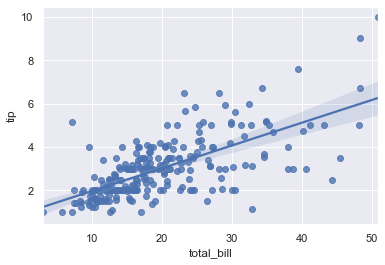

In [3]:
sb.regplot(x="total_bill",y="tip",data=tips)

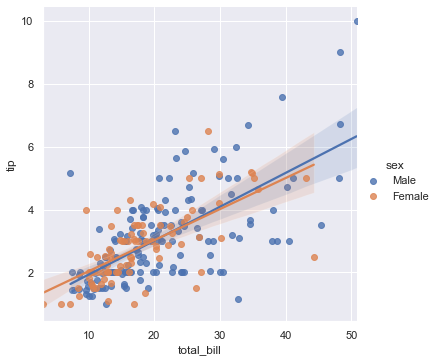

In [4]:
sb.lmplot(x="total_bill",y="tip",hue="sex",data=tips)

###  Difference between lmplot() and regplot()

1. regplot() accepts the x and y variables in a variety of formats including simple numpy arrays, pandas, series,objects, Pandas DataFrame object passed to data. 
2. lmplot() has data as a required parameter and the x and y variables must be specified as strings. 

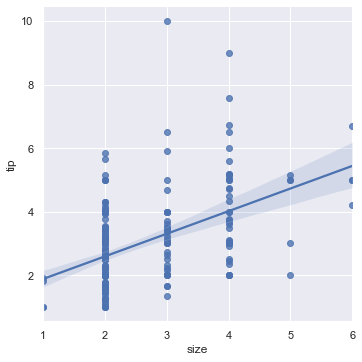

In [5]:
sb.lmplot(x="size",y="tip",data=tips)

One option is to add some random noise (“jitter”) to the discrete values to make the distribution of those values more clear. Note that jitter is applied only to the scatterplot data and does not influence the regression line fit itself:

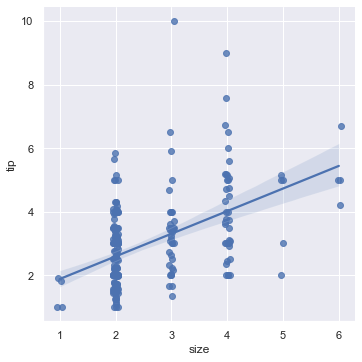

In [6]:
sb.lmplot(x="size",y="tip",data=tips,x_jitter=.05)

## Fitting Different Kinds Of Models

https://en.wikipedia.org/wiki/Anscombe%27s_quartet Important concept to understand

The Anscombe's quartet dataset shows a few examples where simple linear regression provides an identical estimate of a relationship where simple visual inspection clearly shows differences.

In [7]:
anscombe = sb.load_dataset("anscombe")
anscombe

,dataset,x,y
0,I,10.0,8.04
1,I,8.0,6.95
2,I,13.0,7.58
3,I,9.0,8.81
4,I,11.0,8.33
5,I,14.0,9.96
6,I,6.0,7.24
7,I,4.0,4.26
8,I,12.0,10.84
9,I,7.0,4.82


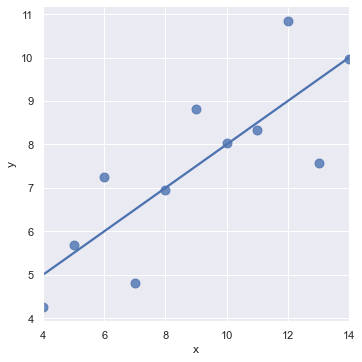

In [8]:
sb.lmplot(x="x",y="y",data=anscombe.query("dataset=='I'"),
         ci=None,scatter_kws={"s":80})

The linear relationship in the second dataset is the same, but the plot clearly shows that this is not a good model

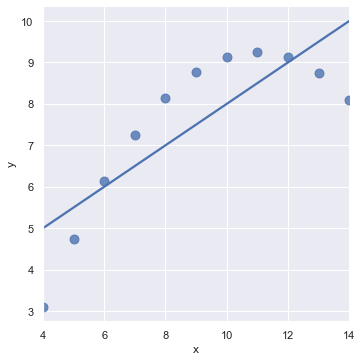

In [9]:
sb.lmplot(x="x",y="y",data=anscombe.query("dataset == 'II'"),
         ci=None,scatter_kws={"s":80})

lmplot() and regplot() can fit a polynomial regression model to explore simple kinds of nonlinear trends in the dataset.

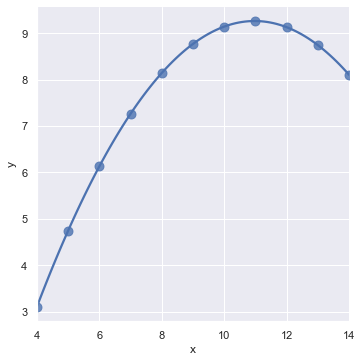

In [10]:
sb.lmplot(x="x",y="y",data=anscombe.query("dataset=='II'"),
         order=2,ci=None,scatter_kws={"s":80})

### Conditioning on other variables

regplot() shows single relationship, lmplot() combines regplot() with FacetGrid to provide an easy interface to show a linear regression on "faceted" plots that allow us to explore interactions with up to three additional categorical variables.

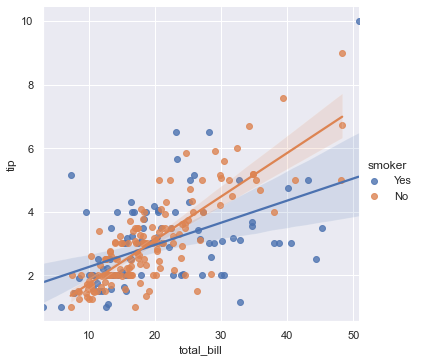

In [11]:
sb.lmplot(x="total_bill",y="tip",hue="smoker",data=tips)

#### Using markers

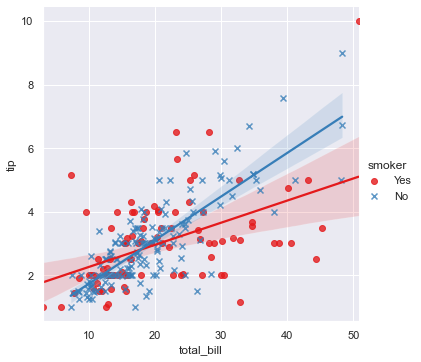

In [17]:
sb.lmplot(x="total_bill",y="tip",hue="smoker",data=tips,
          markers=["o","x"],palette= "Set1") #chose palette from this link https://seaborn.pydata.org/generated/seaborn.color_palette.html#seaborn.color_palette


#### Choose any value from color_palette() method like : "Set1","Set2","flare","ch:s=.25,rot=-.25","light:#5A9","husl","pastel"

To add another variable, we can draw multiple "facets" which each level of the variable appearing in the rows of columns of the grid

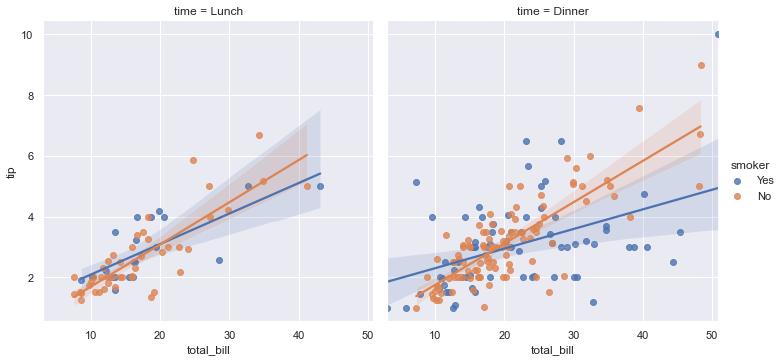

In [18]:
sb.lmplot(x="total_bill",y="tip",hue="smoker",col="time",data=tips)

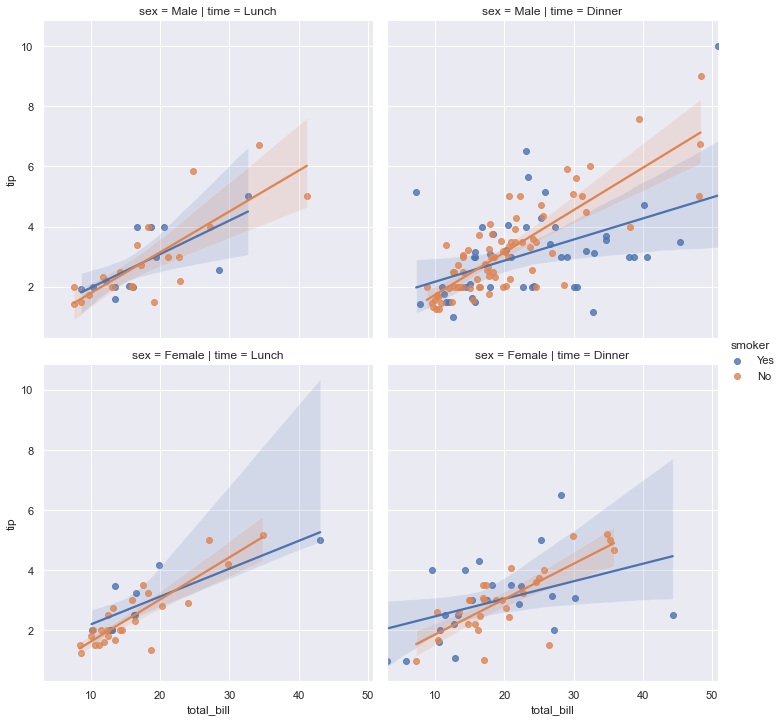

In [19]:
sb.lmplot(x="total_bill",y="tip",hue="smoker",col="time",row="sex",data=tips)

### Controlling the size and shape of the plot

The default plots made by regplot() and lmplot() look the same but on axes that have a different size and shape. This is because regplot() is an axes-level" function drawn onto a specific axes. It means we can make multi-panel figure ourself and control where the regression plot goes. To control the size, we need to create a figure object ourself.

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

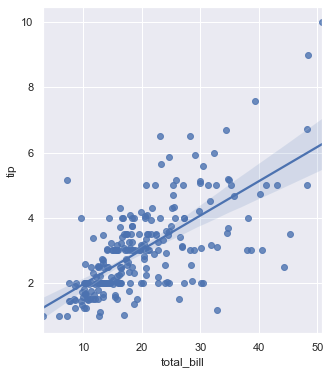

In [28]:
f,ax=plt.subplots(figsize=(5,6))

sb.regplot(x="total_bill",y="tip",data=tips,ax=ax)

In contrast, the size and shape of the lmplot() figure is controlled through the FacetGrid interface using the height and aspect parameters, which apply to each facet in the plot, not to the overall figure itself.

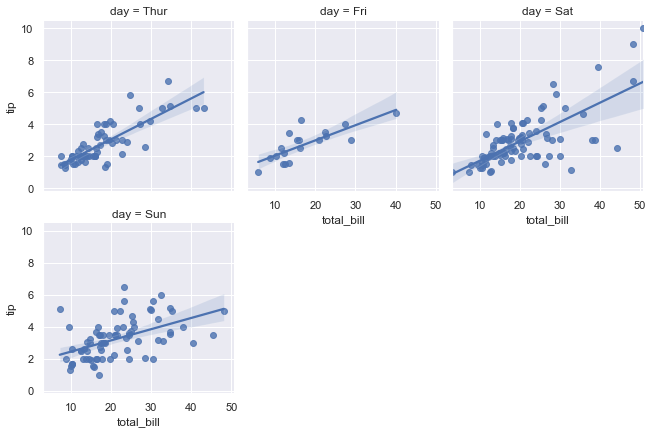

In [30]:
sb.lmplot(x="total_bill",y="tip",col="day",data=tips,
         col_wrap=3,height=3)

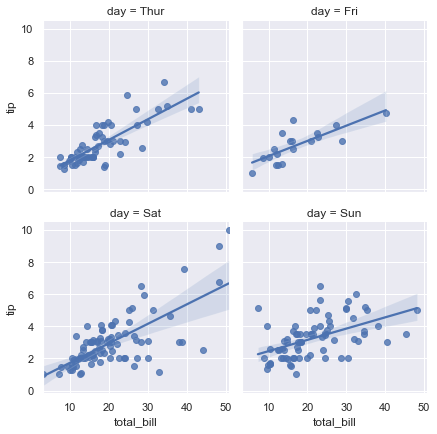

In [31]:
sb.lmplot(x="total_bill",y="tip",col="day",data=tips,
         col_wrap=2,height=3)

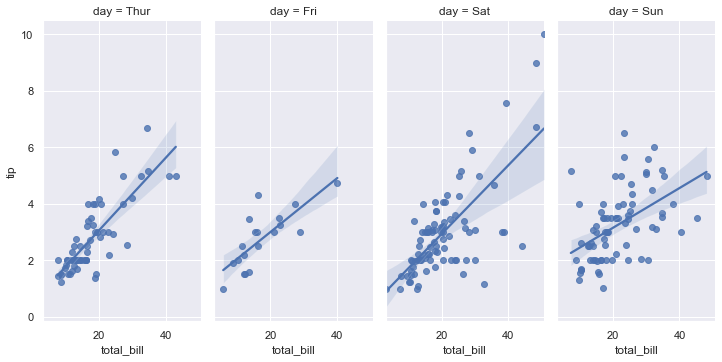

In [32]:
sb.lmplot(x="total_bill",y="tip",col="day",data=tips,aspect=.5)

### Plotting a regression in other contexts